In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
import pathlib
from tensorflow import keras
import os
from keras.callbacks import ModelCheckpoint
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn import datasets
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import csv
from keras.layers import Input, Dense    #using set model component
from keras.models import Model    #using set model 
from keras.utils import plot_model    #show model structure
from keras import layers as Layer
import keras 
from pandas import DataFrame as df
from keras.callbacks import EarlyStopping
import gzip
import pickle
from keras import backend as K
import tensorflow as tf
from keras.layers import Dense, Dropout, Input, Activation, BatchNormalization

Using TensorFlow backend.
/home/eunchoding/anaconda3/envs/tensorflow115/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
def check_correct(predict, y):
    result = {}
    result['True-Positive'] = 0
    result['True-Negative'] = 0
    result['False-Negative'] = 0
    result['False-Positive'] = 0

    for i in range(len(predict)) :
        if predict[i] == y[i] :
            if y[i] == 0 :
                result['True-Negative'] += 1
            else :
                result['True-Positive'] += 1
        else :
            if y[i] == 0 :
                result['False-Positive'] += 1
            else :
                result['False-Negative'] += 1

    for result_k, result_v in result.items():
        print(result_k +" : "+ str(result_v))
    
    acc=(result['True-Positive']+result['True-Negative'])/len(y)
    sensitivity=result['True-Positive']/(result['True-Positive']+result['False-Negative'])
    specificity=result['True-Negative']/(result['True-Negative']+result['False-Positive'])
    print("Accuracy :", acc)
    print("Sensitivity :", sensitivity)
    print("Specificity :", specificity)
    return acc, sensitivity, specificity

In [3]:
def model_performance(x, model, y):
    hypo = model.predict_proba(x)
    pred = np.where(df(hypo)[1] > 0.5, 1, 0).flatten()
    acc, sen, spe=check_correct(pred, y)
    auc=metrics.roc_auc_score(y, df(hypo)[1])
    
    
    df_hypo=df(hypo)[1]
    df_hypo.columns=['hypothesis 1']
    
    df_pred=df(pred)
    df_pred.columns=['prediction']
    
    df_y=df(y)
    df_y.columns=['y']
    
    pred_result=pd.concat([df_y,df_hypo, df_pred],axis=1)
    
    print("Accuracy : ",acc)
    print("AUC : ",auc)
    print(" ")
    print(df(pd.crosstab(y, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)))
    print(" ")
    print(df(pred_result))

    return acc ,sen, spe ,auc, pred_result

In [4]:
def model_performance_DNN(x, model, y):
    hypo = model.predict(x)
    pred = np.where(hypo > 0.5, 1, 0).flatten()
    acc, sen, spe=check_correct(pred, y)
    auc=metrics.roc_auc_score(y, hypo)
    
    df_hypo=df(hypo)
    df_hypo.columns=['hypothesis 1']
    
    df_pred=df(pred)
    df_pred.columns=['prediction']
    
    df_y=df(y)
    df_y.columns=['y']
    
    pred_result=pd.concat([df_y,df_hypo, df_pred],axis=1)
    
    print("Accuracy : ",acc)
    print("AUC : ",auc)
    print(" ")
    print(df(pd.crosstab(y, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)))
    print(" ")
    print(df(pred_result))

    return acc ,sen, spe ,auc, pred_result

### Ensemble Model
##### Classification 1

In [5]:
dataframe = pd.read_csv("./IRIS_train_data_feature16.csv")
dataframe

,SampleID,APOE,CR,EOTAXIN,FASL,genus_Coprococcus,GMCSF,HDL,IGHM,IL7.x,LEPTIN,MCP1,MCV,MONOAB,SCF,SSPG,SSPG_classification,TGL,LPA,index
0,ZJTKAE3.02,5.143022,0.80,92.908626,18.942427,0.004463,81.497581,78,4.848248,19.782682,8167.369050,567.725245,86.5,0.47,50.177236,162.0,1,61,-1.489310,1
1,ZJTKAE3.04,5.141314,0.80,78.127709,17.828167,0.008623,56.095737,82,4.777619,24.178833,6258.660698,486.041809,85.5,0.43,36.298426,162.0,1,56,-1.187511,2
2,ZJTKAE3.06,4.997737,0.90,108.745324,21.170948,0.004238,63.504608,72,4.741192,23.079795,6077.686060,530.688656,86.3,0.52,43.771632,162.0,1,103,-3.774880,3
3,ZJTKAE3.2012,5.385313,1.00,66.514130,20.056687,0.001555,50.803687,84,5.228373,24.178833,6276.703487,471.328644,87.2,0.43,38.433628,162.0,1,96,-1.370451,2
4,ZJTKAE3.2013,5.172769,1.20,87.101837,21.170948,0.000975,49.745276,81,4.816603,25.277871,5335.197964,475.894799,87.0,0.53,46.974434,162.0,1,85,-1.838588,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,ZYXQKWY.05,4.692352,0.80,105.632147,28.146719,0.001885,71.477287,67,5.430463,70.228793,8320.895338,996.713659,93.8,0.64,67.598360,158.5,1,130,-0.942503,4
339,ZYXQKWY.06,4.223759,0.70,114.622117,26.867323,0.002520,83.848356,54,5.507870,104.089104,8380.560673,737.738486,91.6,0.39,53.849541,158.5,1,83,-1.618222,3
340,ZYXQKWY.07,4.874428,0.56,101.137162,27.507021,0.003061,103.779523,64,5.271156,90.294163,9298.116767,759.887678,92.9,0.67,63.588288,158.5,1,91,-2.152476,2
341,ZYXQKWY.08,4.851328,0.64,85.404714,26.867323,0.001406,107.215931,62,5.252873,51.417509,10606.453930,751.368758,92.8,0.78,93.950264,158.5,1,150,0.156366,4


In [6]:
value= dataframe.drop(["SampleID", "SSPG_classification","SSPG", "index"],axis=1)
interest = dataframe.SSPG_classification

print("Information of Training Data")
print("Samples : {}".format(value.shape[0]))
print("Features : {}".format(value.shape[1]))

Information of Training Data
Samples : 343
Features : 16


In [7]:
#MinMax
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

X = np.array(value)
min_max_scaler = MinMaxScaler()
X_MinMax = min_max_scaler.fit_transform(X)

In [8]:
#X_MinMax = df(X_MinMax)
#X_MinMax.to_csv("./minmax.csv")

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X_MinMax, interest, test_size=0.2, random_state=11,stratify=interest)

In [10]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=2)
abc = AdaBoostClassifier(n_estimators=350, learning_rate=0.05)
gbc = GradientBoostingClassifier(n_estimators=400, learning_rate=0.01, min_samples_split=2)
xgb_clf = xgb.XGBClassifier(n_estimators=250, max_depth=5,learning_rate=0.05)

In [11]:
rfc.fit(train_x, train_y)
abc.fit(train_x, train_y)
gbc.fit(train_x, train_y)
xgb_clf.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Random forest
y_pred_rfc = rfc.predict_proba(test_x)[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(test_y, y_pred_rfc)
auc_rfc = auc(fpr_rfc, tpr_rfc)

# adaboost
y_pred_abc = abc.predict_proba(test_x)[:,1]
fpr_abc, tpr_abc, thresholds_abc = roc_curve(test_y, y_pred_abc)
auc_abc = auc(fpr_abc, tpr_abc)

# Gradient Boost
y_pred_gbc = gbc.predict_proba(test_x)[:,1]
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(test_y, y_pred_gbc)
auc_gbc = auc(fpr_gbc, tpr_gbc)

# XGboost
y_pred_xgb = xgb_clf.predict_proba(test_x)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(test_y, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

### DNN model
##### Classification 1

In [14]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5), 
    
    tf.keras.layers.Dense(12, input_shape=(16,),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    #tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(9, input_shape=(12,),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    #tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(5, input_shape=(9,),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    #tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(2, input_shape=(5,),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    #tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, input_shape=(2,),activation='sigmoid'),
])

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
hist=model1.fit(train_x, train_y, batch_size=25, epochs=500)#,callbacks=[tensorboard]

Epoch 1/500
274/274 [==============================] - 2s 8ms/sample - loss: 0.8298 - acc: 0.4672
Epoch 2/500
274/274 [==============================] - 0s 238us/sample - loss: 0.8348 - acc: 0.4453
Epoch 3/500
274/274 [==============================] - 0s 206us/sample - loss: 0.7682 - acc: 0.5036
Epoch 4/500
274/274 [==============================] - 0s 206us/sample - loss: 0.7746 - acc: 0.4927
Epoch 5/500
274/274 [==============================] - 0s 248us/sample - loss: 0.7536 - acc: 0.4818
Epoch 6/500
274/274 [==============================] - 0s 234us/sample - loss: 0.7105 - acc: 0.5803
Epoch 7/500
274/274 [==============================] - 0s 228us/sample - loss: 0.7066 - acc: 0.5657
Epoch 8/500
274/274 [==============================] - 0s 218us/sample - loss: 0.6643 - acc: 0.6168
Epoch 9/500
274/274 [==============================] - 0s 215us/sample - loss: 0.6675 - acc: 0.5876
Epoch 10/500
274/274 [==============================] - 0s 206us/sample - loss: 0.6493 - acc: 0.6314
E

274/274 [==============================] - 0s 230us/sample - loss: 0.1260 - acc: 0.9599
Epoch 163/500
274/274 [==============================] - 0s 221us/sample - loss: 0.1234 - acc: 0.9708
Epoch 164/500
274/274 [==============================] - 0s 233us/sample - loss: 0.1129 - acc: 0.9708
Epoch 165/500
274/274 [==============================] - 0s 210us/sample - loss: 0.1140 - acc: 0.9672
Epoch 166/500
274/274 [==============================] - 0s 204us/sample - loss: 0.1058 - acc: 0.9745
Epoch 167/500
274/274 [==============================] - 0s 241us/sample - loss: 0.1176 - acc: 0.9672
Epoch 168/500
274/274 [==============================] - 0s 221us/sample - loss: 0.1455 - acc: 0.9453
Epoch 169/500
274/274 [==============================] - 0s 216us/sample - loss: 0.1337 - acc: 0.9526
Epoch 170/500
274/274 [==============================] - 0s 234us/sample - loss: 0.1084 - acc: 0.9672
Epoch 171/500
274/274 [==============================] - 0s 210us/sample - loss: 0.0995 - acc: 0

274/274 [==============================] - 0s 205us/sample - loss: 0.0670 - acc: 0.9781
Epoch 323/500
274/274 [==============================] - 0s 215us/sample - loss: 0.0504 - acc: 0.9891
Epoch 324/500
274/274 [==============================] - 0s 215us/sample - loss: 0.0583 - acc: 0.9818
Epoch 325/500
274/274 [==============================] - 0s 208us/sample - loss: 0.0411 - acc: 0.9891
Epoch 326/500
274/274 [==============================] - 0s 200us/sample - loss: 0.0294 - acc: 0.9964
Epoch 327/500
274/274 [==============================] - 0s 211us/sample - loss: 0.0234 - acc: 1.0000
Epoch 328/500
274/274 [==============================] - 0s 216us/sample - loss: 0.0425 - acc: 0.9891
Epoch 329/500
274/274 [==============================] - 0s 206us/sample - loss: 0.0575 - acc: 0.9818
Epoch 330/500
274/274 [==============================] - 0s 207us/sample - loss: 0.0484 - acc: 0.9854
Epoch 331/500
274/274 [==============================] - 0s 209us/sample - loss: 0.0720 - acc: 0

274/274 [==============================] - 0s 240us/sample - loss: 0.0469 - acc: 0.9891
Epoch 483/500
274/274 [==============================] - 0s 245us/sample - loss: 0.0770 - acc: 0.9708
Epoch 484/500
274/274 [==============================] - 0s 236us/sample - loss: 0.0293 - acc: 0.9927
Epoch 485/500
274/274 [==============================] - 0s 222us/sample - loss: 0.0453 - acc: 0.9854
Epoch 486/500
274/274 [==============================] - 0s 203us/sample - loss: 0.0462 - acc: 0.9745
Epoch 487/500
274/274 [==============================] - 0s 235us/sample - loss: 0.0322 - acc: 0.9818
Epoch 488/500
274/274 [==============================] - 0s 231us/sample - loss: 0.0352 - acc: 0.9927
Epoch 489/500
274/274 [==============================] - 0s 208us/sample - loss: 0.0245 - acc: 0.9964
Epoch 490/500
274/274 [==============================] - 0s 199us/sample - loss: 0.0326 - acc: 0.9891
Epoch 491/500
274/274 [==============================] - 0s 201us/sample - loss: 0.0394 - acc: 0

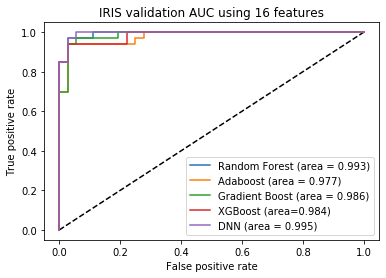

In [16]:
from sklearn.metrics import roc_curve
y_pred_keras = model1.predict(test_x).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (area = {:.3f})'.format(auc_rfc))
plt.plot(fpr_abc, tpr_abc, label='Adaboost (area = {:.3f})'.format(auc_abc))
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boost (area = {:.3f})'.format(auc_gbc))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area={:.3f})'.format(auc_xgb))
plt.plot(fpr_keras, tpr_keras, label='DNN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('IRIS validation AUC using 16 features')
plt.legend(loc='best')
plt.savefig('./IRIS validation AUC using 16 features', dpi=500, bbox_inches = 'tight')

# test set

In [17]:
test_set = pd.read_csv("./IRIS_test_data_feature16.csv")
test_set

,SampleID,APOE,CR,EOTAXIN,FASL,genus_Coprococcus,GMCSF,HDL,IGHM,IL7.x,LEPTIN,MCP1,MCV,MONOAB,SCF,SSPG,SSPG_classification,TGL,LPA
0,ZJXC41N.1011,4.493446,1.20,53.844772,22.842338,0.006155,76.205530,49,5.876318,130.785507,6524.928521,512.424037,87.4,0.28,59.785643,75.0,0,26,1.259847
1,ZJXC41N.11,4.676616,1.14,34.774749,7.312334,0.004384,64.626523,66,6.040906,63.103091,8287.130338,400.446137,89.4,0.20,58.214457,75.0,0,49,2.421501
2,ZK112BX.06,4.498274,0.80,16.364588,23.399469,0.009931,23.285023,48,5.692875,30.773060,2639.714672,145.609603,90.0,0.32,38.967428,234.0,1,128,1.454972
3,ZK112BX.2002,4.658561,0.70,22.699267,36.770594,0.003895,23.285023,53,6.227691,37.916807,1303.454801,157.786015,89.7,0.24,55.515240,234.0,1,67,1.352161
4,ZKFV71L.6021,6.317280,0.78,57.453092,21.344060,0.019458,81.871313,83,3.168386,45.344634,7268.191787,871.352240,90.1,0.25,88.053678,65.0,0,73,-2.561154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,ZX52KVK.6021,3.733684,0.70,75.743014,29.043511,0.000625,43.730312,54,4.527109,79.607103,4338.509761,484.581299,91.0,0.32,60.941081,188.0,1,82,-0.090156
81,ZY1ZKJY.2012,5.526337,0.80,77.288790,41.331150,0.004677,59.348281,58,6.196430,136.268629,5789.050806,671.190247,86.7,0.72,94.595111,119.0,0,187,-0.117142
82,ZY1ZKJY.2014,5.544801,0.90,92.746548,25.692336,0.002760,46.333307,60,5.409079,71.178116,5451.129213,860.809016,86.0,0.63,93.685543,119.0,0,133,0.821560
83,ZY9XQJP.06,4.476238,0.70,81.689265,62.008463,0.005166,40.127258,68,3.734070,130.584840,1955.885785,802.573426,101.9,0.55,68.523684,151.0,1,78,-3.105165


In [18]:
test_value= test_set.drop(["SampleID", "SSPG_classification","SSPG"],axis=1)
test_interest = test_set.SSPG_classification

print("Information of Training Data")
print("Samples : {}".format(value.shape[0]))
print("Features : {}".format(value.shape[1]))

Information of Training Data
Samples : 343
Features : 16


In [19]:
xx = np.array(test_value)
test_X_MinMax = min_max_scaler.fit_transform(xx)

In [20]:
# Test score
randomforest_pred = rfc.predict(test_X_MinMax)
adaboost_pred = abc.predict(test_X_MinMax)
gradient_pred = gbc.predict(test_X_MinMax)
xgb_pred=xgb_clf.predict(test_X_MinMax)
# DNN model predict values
DNN_predict = model1.predict_classes(test_X_MinMax)

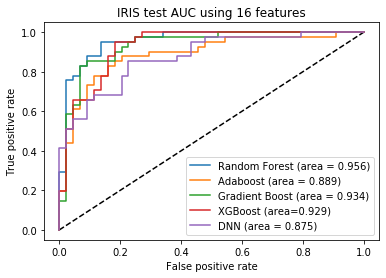

In [21]:
# Random forest
y_pred_rfc2 = rfc.predict_proba(test_X_MinMax)[:,1]
fpr_rfc2, tpr_rfc2, thresholds_rfc2 = roc_curve(test_interest, y_pred_rfc2)
auc_rfc2 = auc(fpr_rfc2, tpr_rfc2)

# adaboost
y_pred_abc2 = abc.predict_proba(test_X_MinMax)[:,1]
fpr_abc2, tpr_abc2, thresholds_abc2 = roc_curve(test_interest, y_pred_abc2)
auc_abc2 = auc(fpr_abc2, tpr_abc2)

# Gradient Boost
y_pred_gbc2 = gbc.predict_proba(test_X_MinMax)[:,1]
fpr_gbc2, tpr_gbc2, thresholds_gbc2 = roc_curve(test_interest, y_pred_gbc2)
auc_gbc2 = auc(fpr_gbc2, tpr_gbc2)

# XGboost
y_pred_xgb2 = xgb_clf.predict_proba(test_X_MinMax)[:,1]
fpr_xgb2, tpr_xgb2, thresholds_xgb2 = roc_curve(test_interest, y_pred_xgb2)
auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)


y_pred_keras2 = model1.predict(test_X_MinMax).ravel()
fpr_keras2, tpr_keras2, thresholds_keras2 = roc_curve(test_interest, y_pred_keras2)
auc_keras2 = auc(fpr_keras2, tpr_keras2)

plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rfc2, tpr_rfc2, label='Random Forest (area = {:.3f})'.format(auc_rfc2))
plt.plot(fpr_abc2, tpr_abc2, label='Adaboost (area = {:.3f})'.format(auc_abc2))
plt.plot(fpr_gbc2, tpr_gbc2, label='Gradient Boost (area = {:.3f})'.format(auc_gbc2))
plt.plot(fpr_xgb2, tpr_xgb2, label='XGBoost (area={:.3f})'.format(auc_xgb2))
plt.plot(fpr_keras2, tpr_keras2, label='DNN (area = {:.3f})'.format(auc_keras2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('IRIS test AUC using 16 features')
plt.legend(loc='best')
plt.savefig('./IRIS test AUC using 16 features', dpi=500, bbox_inches = 'tight')

In [22]:
model1.save("./feature_reduction_model_weights.h5")